<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Handled_Imbalanced_StrokesDS_Build_Log_Model_%26_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries for analysis and visualization purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Handled the imbalanced dataset using over and under sampling techniques
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the data set:
df = pd.read_csv("/content/dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
# Lets check the information and how the data is imbalanced:
def data(df):

  print(f"The total number of features are: {df.shape[1]}.\n")
  print(f"Features of dataset df are:{list(df.columns)}.\n")
  print(f"Total number of records are:{df.shape}.\n")
  print("*"*170)

  print("Some first records the of the dataset for male and female:\n",df.groupby("gender").first(),"\n")
  print("Dataset basic info:\n\n")
  print(f"{df.info()}\n")
  print("*"*170)
  print(f"Null values are:\n{df.isnull().sum()}\n")
  print("*"*170)

  # Checking the data set is imbalanced or not:
  print("Imbalanced data set checking:\n")
  # simple way to find the percentage of target column to check the data is imbalaned or not
  print(f"Majority and Minoirty class is:\n{df.stroke.value_counts(normalize=True)*100}\n\n")

  # alter-nate way
  class_Majority = np.round((df.stroke.value_counts()[0]/df.shape[0])*100,2)
  class_Minority = np.round((df.stroke.value_counts()[1]/df.shape[0])*100,2)

  print(f"The percentage of class 0 is {class_Majority}%")
  print(f"The percentage of class 1 is {class_Minority}%")
data(df)

The total number of features are: 12.

Features of dataset df are:['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'].

Total number of records are:(43400, 12).

**************************************************************************************************************************************************************************
Some first records the of the dataset for male and female:
            id   age  hypertension  heart_disease ever_married work_type  \
gender                                                                    
Female  16523   8.0             0              0           No   Private   
Male    30669   3.0             0              0           No  children   
Other   56156  26.0             0              0           No   Private   

       Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
gender                                           

In [5]:
# lets find the numberical and categorical features:
num_feat = [f for f in df.columns if df[f].dtypes != 'O']

cat_feat = [cat for cat in df.columns if cat not in num_feat]

print(f"Numerical Features:\n{num_feat}\n\n")
print(f"Categorical Features:\n{cat_feat}")

Numerical Features:
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


Categorical Features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [6]:
# remove irrelevent Features:
df.drop(columns=['id'],inplace=True)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
num_feat.remove('id')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [11]:
# replacing the missing values with mean and mode:
mean = df.bmi.mean()
mode = df.smoking_status.mode()
display(mean,mode)

28.605038390004296

0    never smoked
Name: smoking_status, dtype: object

In [12]:
df['bmi'] = df['bmi'].fillna(28.60)
df['smoking_status'] = df['smoking_status'].fillna("never smoked")

In [13]:
# lets convert catgerical data into binary format
from sklearn.preprocessing import LabelEncoder

In [14]:
encode = LabelEncoder()
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
  df[i] = encode.fit_transform(df[i])

In [67]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0


### ***Oversampling*** :
###### ***Increasing the numbe of instances of Minority class***

In [15]:
df.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [16]:
# perform oversampling:
Minority = df[df['stroke']==1]
df_oversampled_minority = resample(Minority,replace=True,n_samples=len(df[df['stroke']==0]),random_state=0)
print(f"Minority class will be resample with length of majority class:\n {df_oversampled_minority.stroke.value_counts()}\n")

# Add the increased instances means --> of Minority class
df_oversampled = pd.concat([df[df['stroke']==0],df_oversampled_minority])
print(f"After adding the instances of Majority class 0 in Minority class 1 \n{df_oversampled['stroke'].value_counts()}\n\n")

Minority class will be resample with length of majority class:
 1    42617
Name: stroke, dtype: int64

After adding the instances of Majority class 0 in Minority class 1 
0    42617
1    42617
Name: stroke, dtype: int64




In [17]:
df_oversampled.duplicated().sum()

41834

### ***UnderSampling:***
###### ***Reduce the number of instances of Majority class***

In [18]:
# perform udersampling:
Majority = df[df['stroke']==0]
df_undersampled_majority = resample(Majority,replace=True,n_samples=len(df[df['stroke']==1]),random_state=0)
print(f"Majority class will be resample with length of Minority class:\n {df_undersampled_majority.stroke.value_counts()}\n")

# Add the reduced instances means --> of Majority class
df_undersampled = pd.concat([df[df['stroke']==1],df_undersampled_majority])
print(f"After adding the instances of Minority class 1 in Majority class 0 \n{df_undersampled['stroke'].value_counts()}\n\n")

Majority class will be resample with length of Minority class:
 0    783
Name: stroke, dtype: int64

After adding the instances of Minority class 1 in Majority class 0 
1    783
0    783
Name: stroke, dtype: int64




In [83]:
df_undersampled.duplicated().sum()

7

In [86]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0


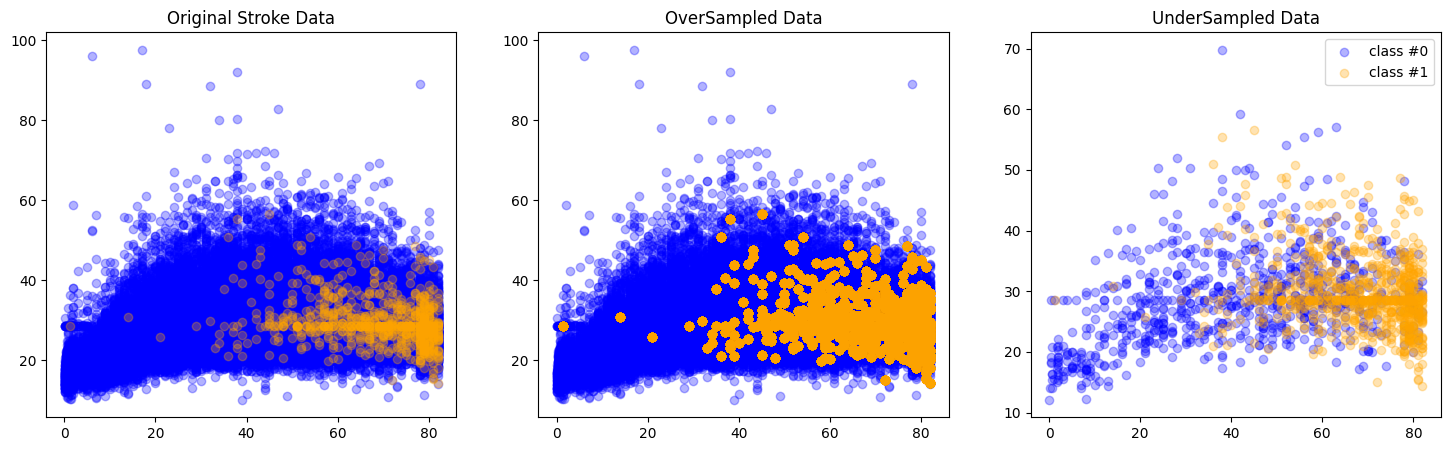

In [21]:

fig, axs = plt.subplots(1,3,figsize=(18,5))

colors = ["blue","orange"]
# original data:
axs[0].scatter(df[df['stroke']==0]['age'],df[df['stroke']==0]['bmi'],label="class #0",color=colors[0],alpha=0.3)
axs[0].scatter(df[df['stroke']==1]['age'],df[df['stroke']==1]['bmi'],label="class #1",color=colors[1],alpha=0.3)
axs[0].title.set_text("Original Stroke Data")
plt.legend()


# oversampled data points:
axs[1].scatter(df_oversampled[df_oversampled['stroke']==0]['age'],df_oversampled[df_oversampled['stroke']==0]['bmi'],label="class #0",color=colors[0],alpha=0.3)
axs[1].scatter(df_oversampled[df_oversampled['stroke']==1]['age'],df_oversampled[df_oversampled['stroke']==1]['bmi'],label="class #1",color=colors[1],alpha=0.3)
axs[1].title.set_text("OverSampled Data")
plt.legend()

# Under sampled data points:
axs[2].scatter(df_undersampled[df_undersampled['stroke']==0]['age'],df_undersampled[df_undersampled['stroke']==0]['bmi'],label="class #0",color=colors[0],alpha=0.3)
axs[2].scatter(df_undersampled[df_undersampled['stroke']==1]['age'],df_undersampled[df_undersampled['stroke']==1]['bmi'],label="class #1",color=colors[1],alpha=0.3)
axs[2].title.set_text("UnderSampled Data")
plt.legend()
plt.show()


In [85]:
!pip install sweetviz
print("Used to get Visulization report with some statistical info")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 36.6 MB/s eta 0:00:00
Used to get Visulization report with some statistical info


In [86]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


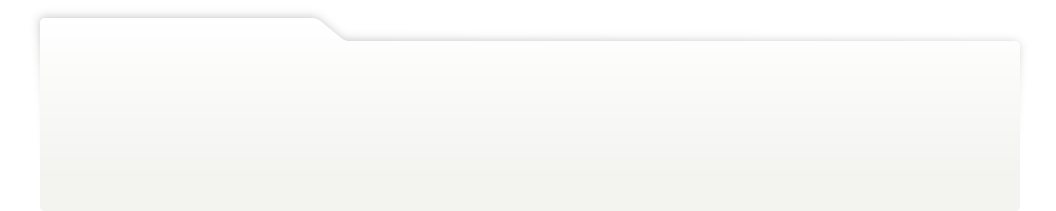
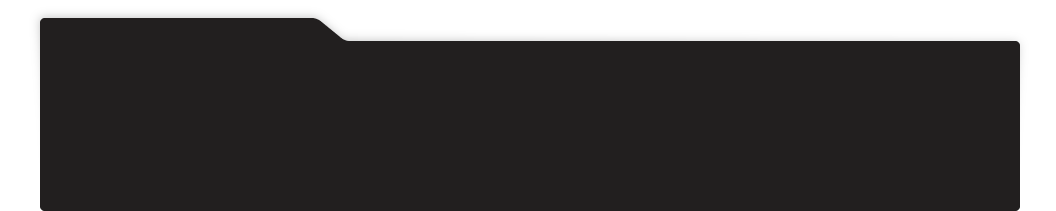
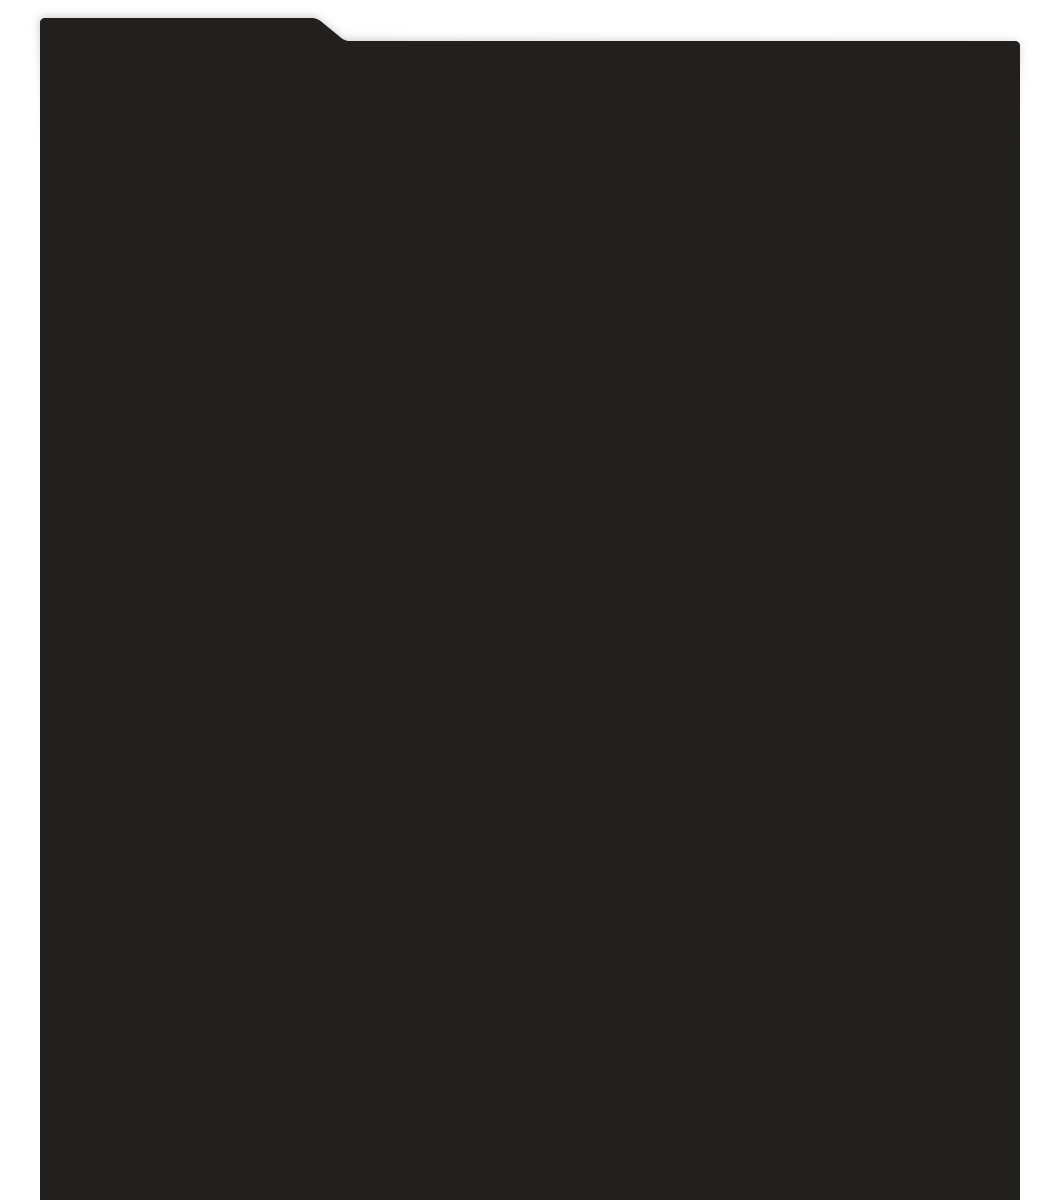
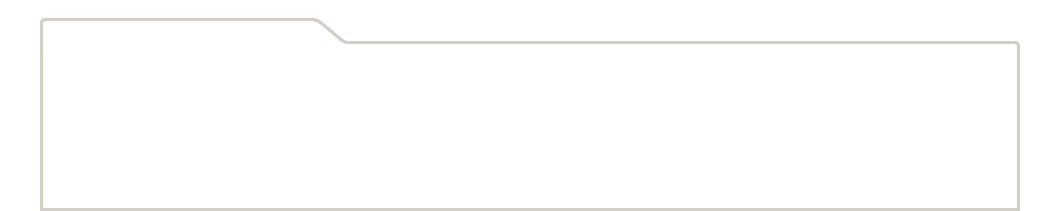
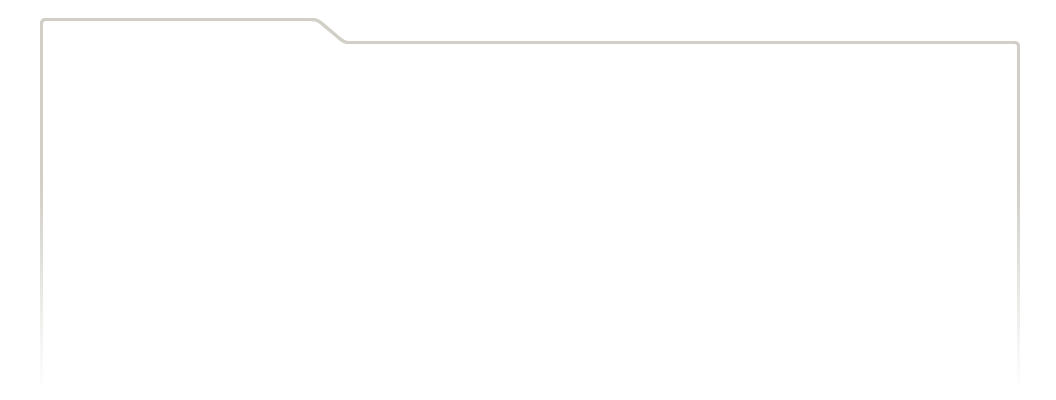
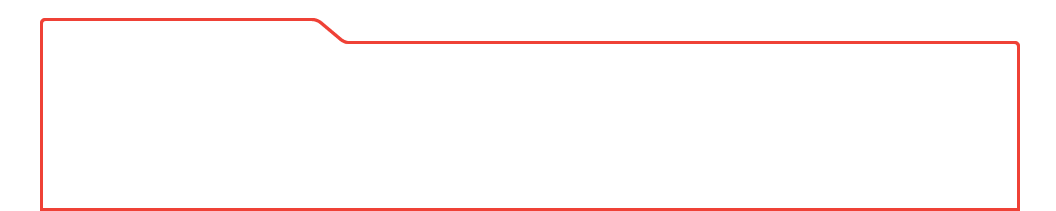
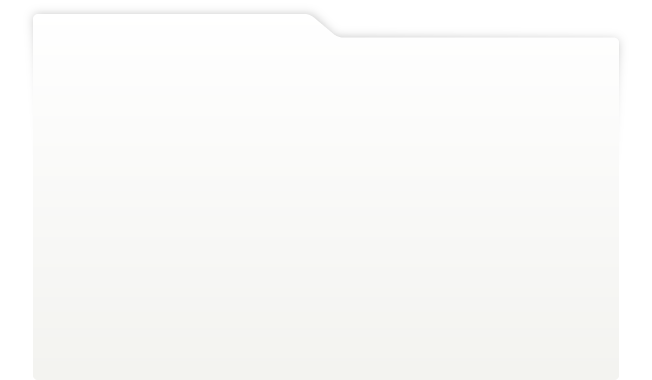
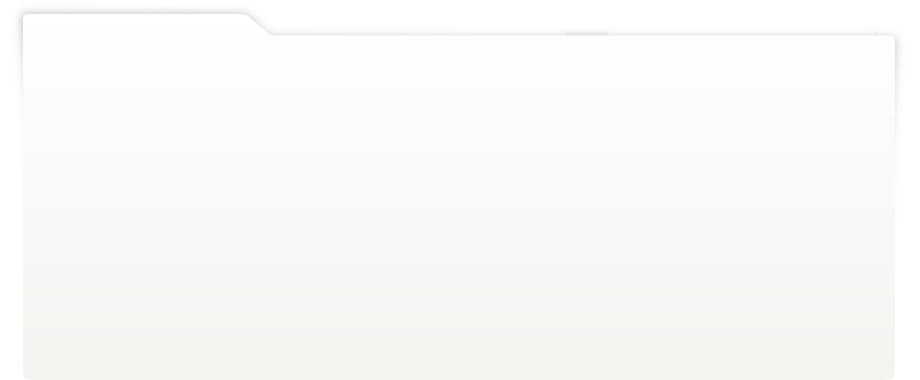
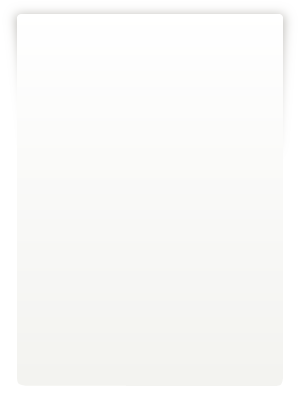
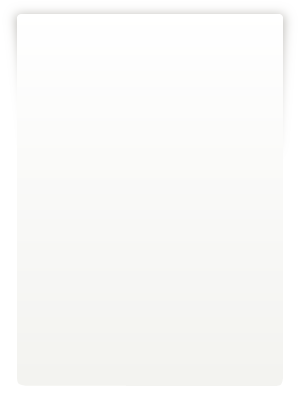
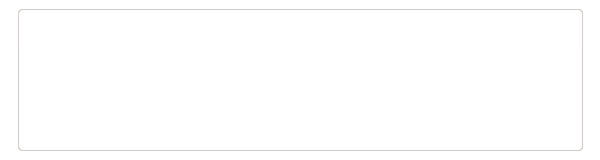
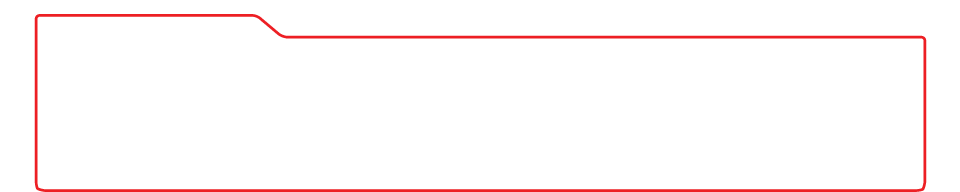
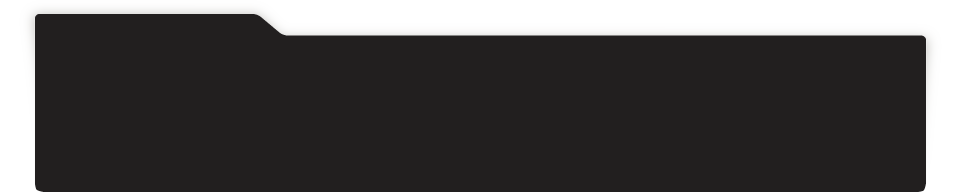
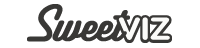
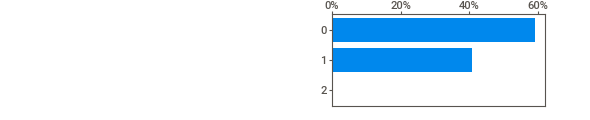
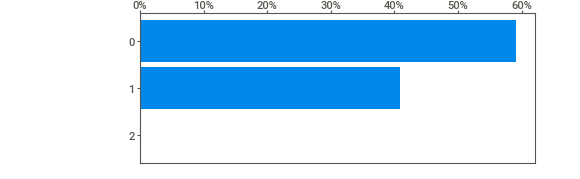
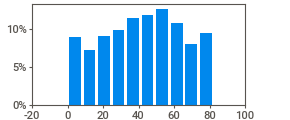
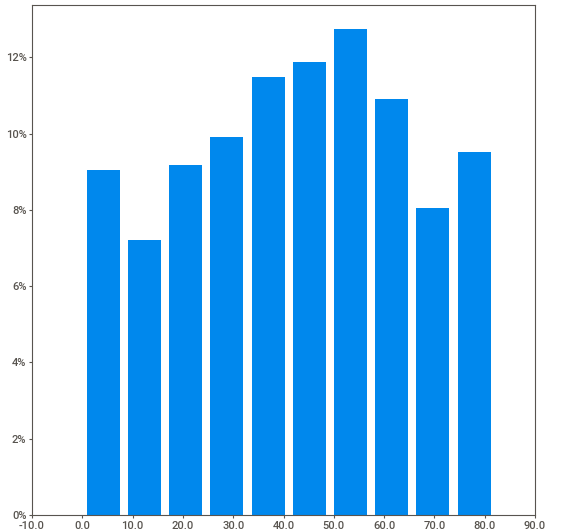
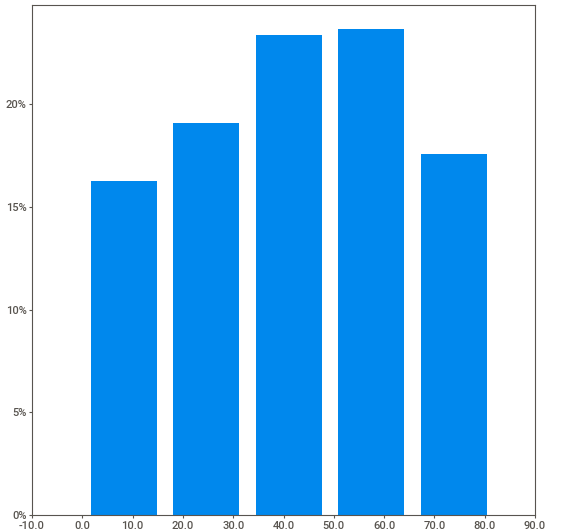
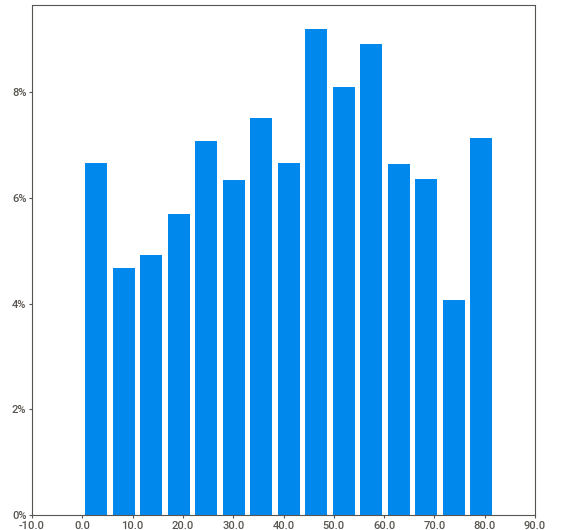
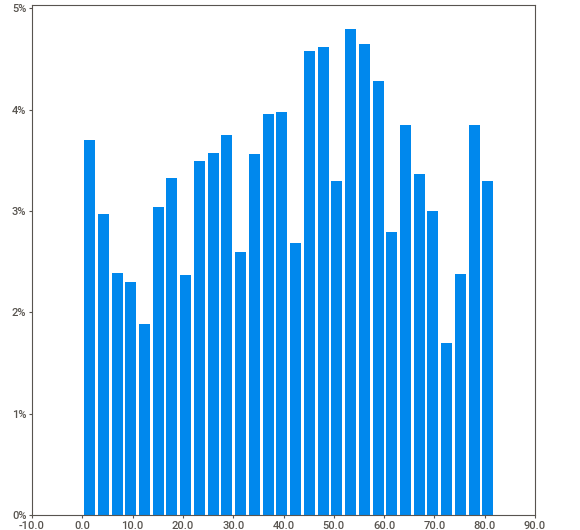
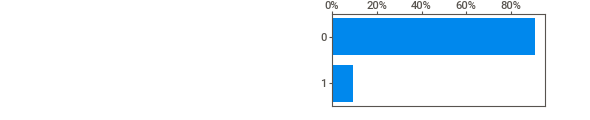
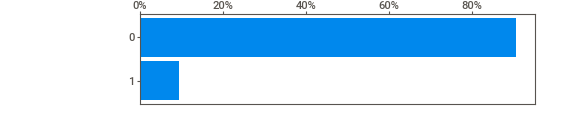
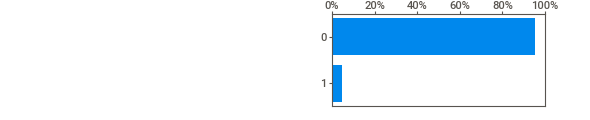
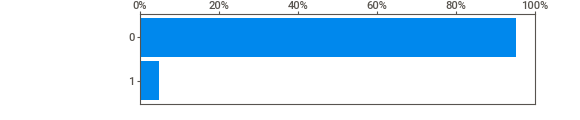
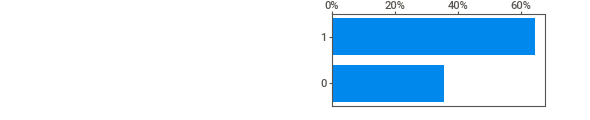
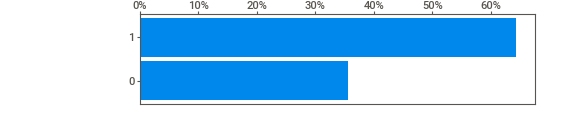
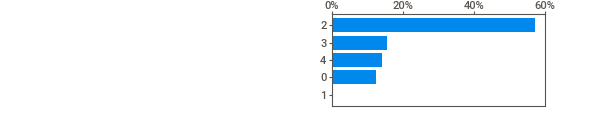
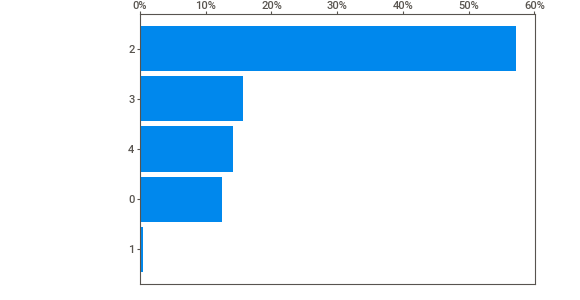
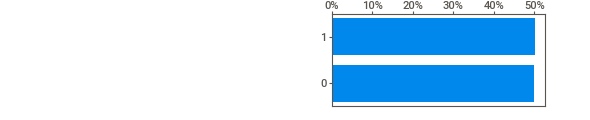
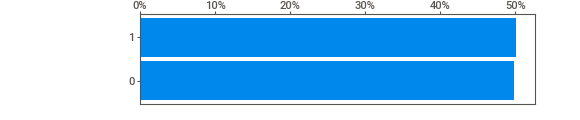
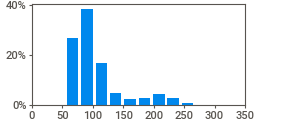
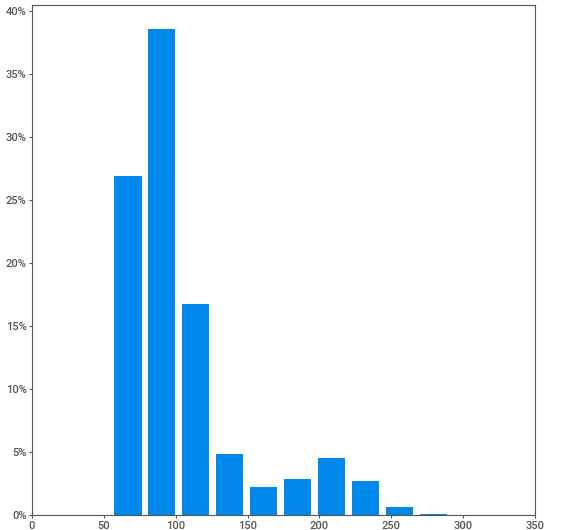
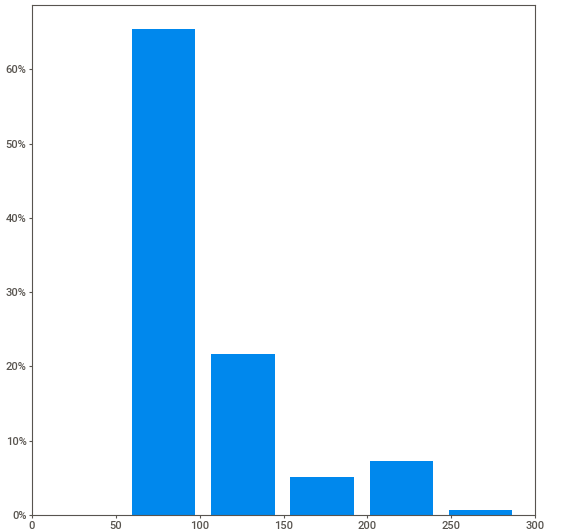
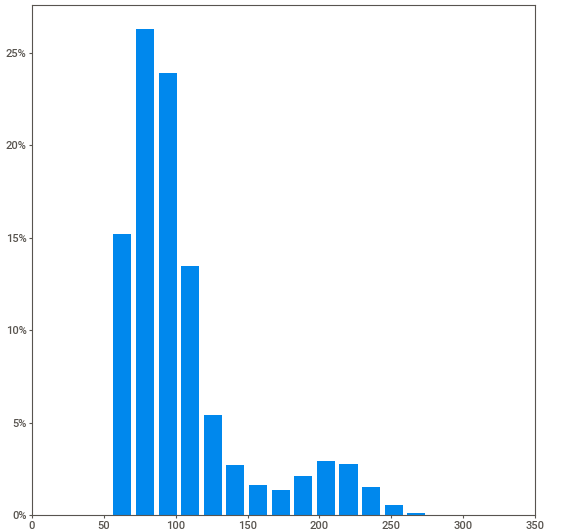
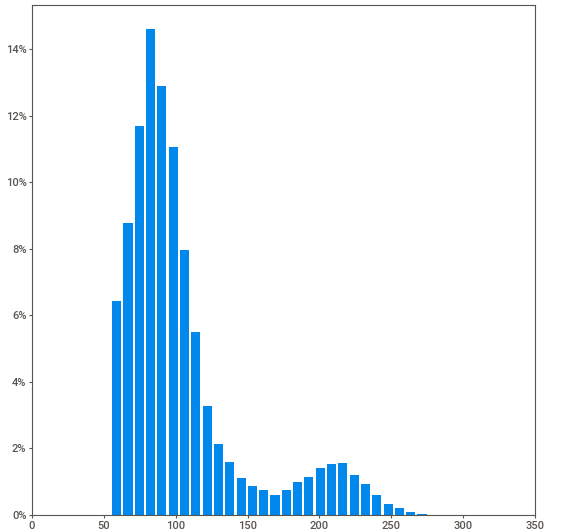
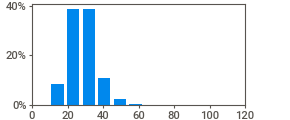
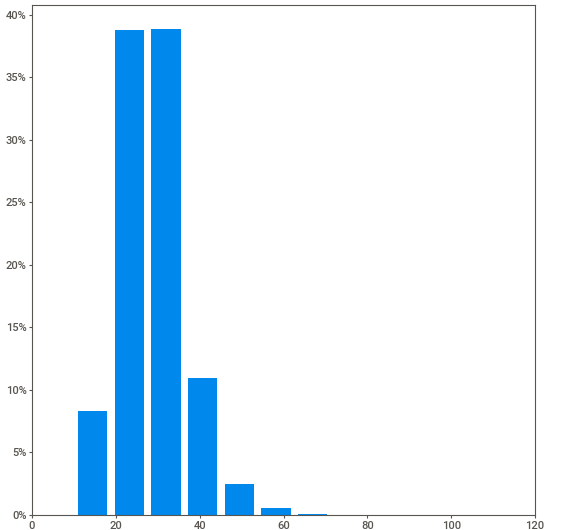
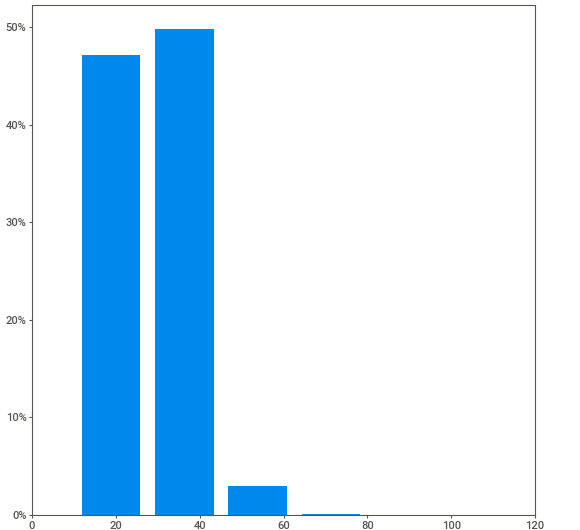
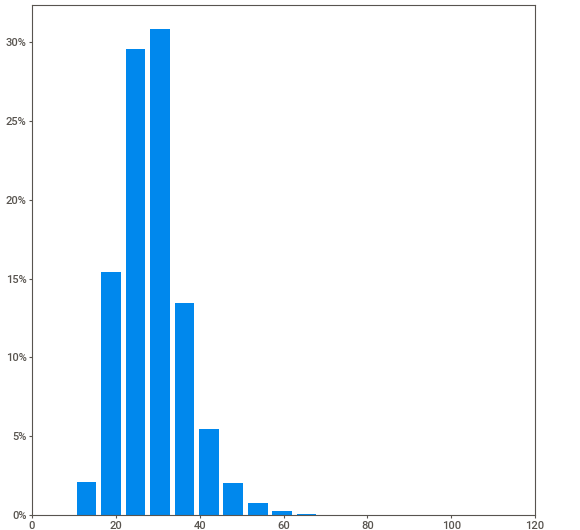
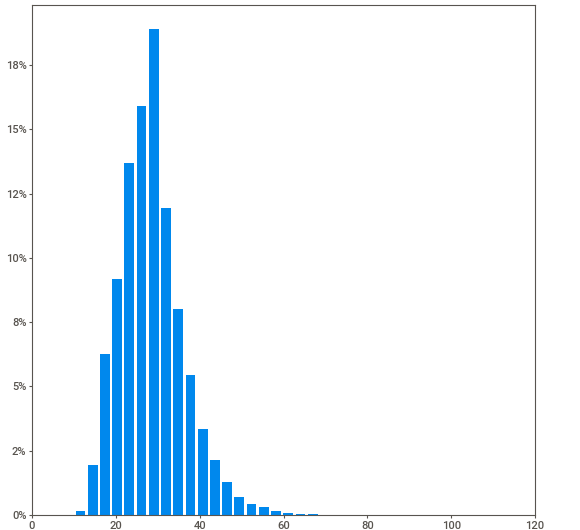
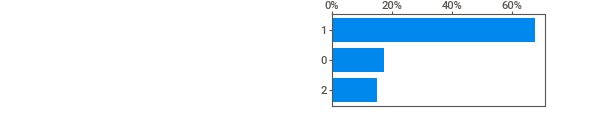
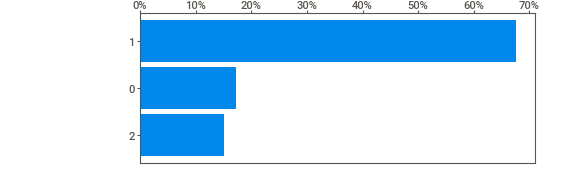
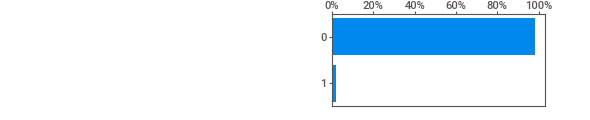
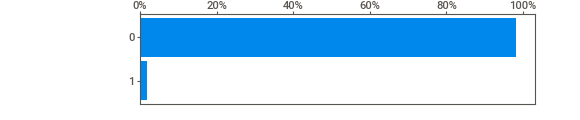
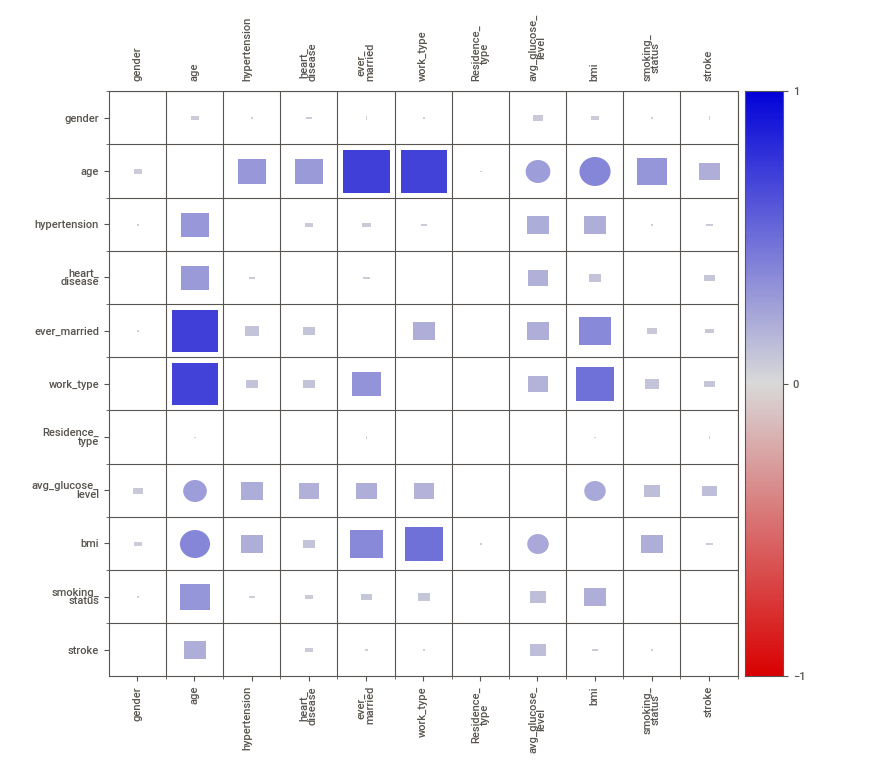
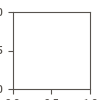

In [87]:
report = sv.analyze(df)
report.show_notebook()

In [38]:
X = df_oversampled.drop(columns=['stroke'])
y = df_oversampled['stroke']
display("Displaying the Oversampled data:",X,y)

'Displaying the Oversampled data:'

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,3.0,0,0,0,4,0,95.12,18.0,1
1,1,58.0,1,0,1,2,1,87.96,39.2,1
2,0,8.0,0,0,0,2,1,110.89,17.6,1
3,0,70.0,0,0,1,2,0,69.04,35.9,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1
...,...,...,...,...,...,...,...,...,...,...
25298,0,48.0,0,0,1,2,0,57.56,30.8,1
35959,1,60.0,0,0,0,2,1,172.81,30.6,2
43268,1,69.0,0,0,1,3,0,97.36,28.0,1
41204,1,65.0,0,0,1,3,1,85.94,28.6,1


0        0
1        0
2        0
3        0
4        0
        ..
25298    1
35959    1
43268    1
41204    1
38090    1
Name: stroke, Length: 85234, dtype: int64

### ***Modeling***

In [30]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model

LogisticRegression()

In [36]:
X.shape

(85234, 10)

In [40]:
y.shape

(85234,)

### ***Data Splitting***

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [43]:
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [45]:
y_test.values

array([1, 1, 0, ..., 0, 0, 1])

In [47]:
# data accuracy:
model.score(x_train,y_train)

0.775267892061009

### ***Performance measures:***

In [48]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report,accuracy_score

In [49]:
# Accuracy of model:
accuracy_score(y_test,y_pred)

0.7736167816415599

In [52]:
# confusion matrix:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[7906, 2748],
       [2076, 8579]])

In This case we predict through oversampled data where we increased the number of instances of Minority class 1


In this case Object is to providing medical surgery to the person: 


Here total 10654 persons are who did not have stroke and 10655 having strokes


Out of 10654 --> 7906 did not occurs stroke (TP)

2748 remaining which are not having stroke model predicting that they have stroke --> False Positive

Out of 10655 --> 8579 persons are having strokes predict by model (TP)

2076 remaning which are have stroke and model predicting taht they dont have stroke --> False Negative --> According to objective this will be more dangerous for person





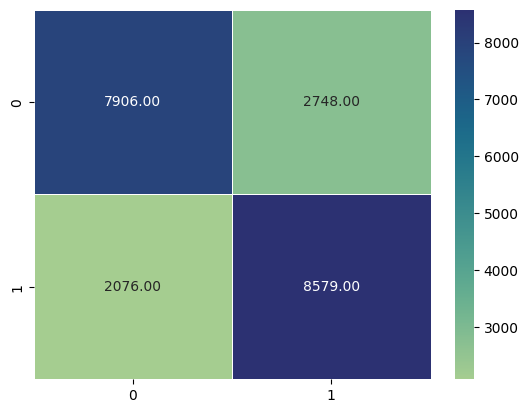

In [56]:
print("In This case we predict through oversampled data where we increased the number of instances of Minority class 1\n\n")
sns.heatmap(data=con_mat,annot=True,fmt=".2f",linewidth=0.6,linecolor="white",cmap="crest")
print("In this case Object is to providing medical surgery to the person: \n\n")
print("Here total 10654 persons are who did not have stroke and 10655 having strokes\n\n")
print("Out of 10654 --> 7906 did not occurs stroke (TP)\n")
print("2748 remaining which are not having stroke model predicting that they have stroke --> False Positive\n")
print("Out of 10655 --> 8579 persons are having strokes predict by model (TP)\n")
print("2076 remaning which are have stroke and model predicting taht they dont have stroke --> False Negative --> According to objective this will be more dangerous for person\n\n\n")

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77     10654
           1       0.76      0.81      0.78     10655

    accuracy                           0.77     21309
   macro avg       0.77      0.77      0.77     21309
weighted avg       0.77      0.77      0.77     21309



In [57]:
recall_score(y_test,y_pred)

0.805161895823557

In [60]:
round(precision_score(y_test,y_pred)*100)

76

In [61]:
f1_score(y_test,y_pred)

0.7805477208625239

In [62]:
ndf = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
ndf.head()

,Actual,Predicted
28357,1,1
26160,1,1
34171,0,0
4299,0,0
8257,0,0


Text(0.5, 1.0, 'Logitic Rgeression Plot')

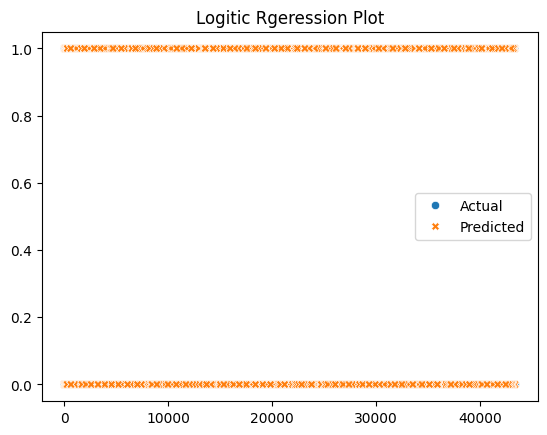

In [66]:
# Actual vs Predicted scatter plot:
sns.scatterplot(data=ndf)
plt.title("Logitic Rgeression Plot")

In [67]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,1,0


In [68]:
# create model on Under sampled data:
X1 = df_undersampled.drop(columns=['stroke'])
y1 = df_undersampled['stroke']
display(X1,y1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
63,1,67.0,0,1,1,2,1,228.69,36.6,0
81,0,61.0,0,0,1,3,0,202.21,28.6,1
141,1,80.0,0,1,1,2,0,105.92,32.5,1
257,0,49.0,0,0,1,2,1,171.23,34.4,2
264,0,79.0,1,0,1,3,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
12472,0,35.0,0,0,0,2,1,91.10,19.3,1
25833,0,52.0,0,1,1,0,0,101.98,25.6,0
2174,0,19.0,1,0,0,2,0,65.96,29.0,1
31575,0,40.0,0,0,1,2,1,80.89,27.6,1


63       1
81       1
141      1
257      1
264      1
        ..
12472    0
25833    0
2174     0
31575    0
27685    0
Name: stroke, Length: 1566, dtype: int64

In [69]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3)

In [70]:
model.fit(x1_train,y1_train)

LogisticRegression()

In [71]:
y1_pred = model.predict(x1_test)
y1_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [72]:
y1_test.values

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [74]:
model.score(x1_train,y1_train)*100

79.01459854014598

In [76]:
# performance metrics:
accuracy_score(y1_test,y1_pred)

0.7553191489361702

In [77]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       255
           1       0.70      0.82      0.75       215

    accuracy                           0.76       470
   macro avg       0.76      0.76      0.76       470
weighted avg       0.76      0.76      0.76       470



In [79]:
con_mat1 = confusion_matrix(y1_test,y1_pred)
con_mat1

array([[179,  76],
       [ 39, 176]])

<Axes: >

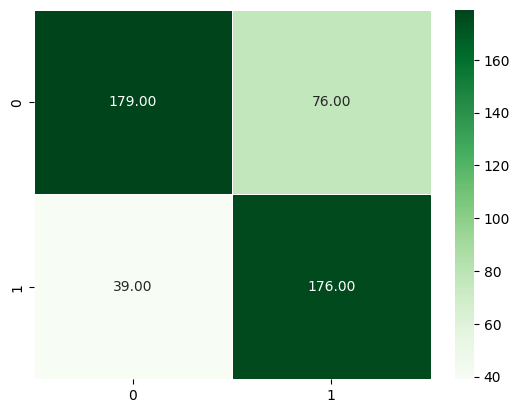

In [82]:
sns.heatmap(data=con_mat1,annot=True,linecolor="white",linewidth=0.5,cmap="Greens",fmt=".2f")

In [83]:
precision_score(y1_test,y1_pred)

0.6984126984126984

In [84]:
recall_score(y1_test,y1_pred)

0.8186046511627907

### ***Decision Tree***

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [90]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

### ***Lets take Undersampled data***

In [92]:
display(x1_train,y1_train)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
12593,0,39.0,0,0,1,2,1,83.24,26.3,1
5771,1,45.0,0,0,1,2,0,64.14,29.4,1
34870,1,65.0,0,0,1,2,1,220.98,28.5,2
6789,1,71.0,1,1,0,0,0,216.94,30.9,1
28241,1,24.0,0,0,1,2,0,61.66,29.6,1
...,...,...,...,...,...,...,...,...,...,...
19466,1,64.0,1,0,1,2,1,108.96,30.5,0
13650,0,38.0,0,0,1,0,0,89.72,19.1,1
25811,1,59.0,0,0,1,2,1,67.37,32.7,0
5296,0,70.0,0,1,1,2,0,59.35,32.3,0


12593    1
5771     1
34870    1
6789     1
28241    0
        ..
19466    1
13650    0
25811    0
5296     1
34541    0
Name: stroke, Length: 1096, dtype: int64

In [93]:
# training:
model.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [94]:
y1_pred = model.predict(x1_test)
y1_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [95]:
y1_test.values

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [97]:
accuracy_score(y1_test,y1_pred)

0.7148936170212766

In [105]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       255
           1       0.68      0.72      0.70       215

    accuracy                           0.71       470
   macro avg       0.71      0.72      0.71       470
weighted avg       0.72      0.71      0.72       470



In [98]:
confusion_matrix(y1_test,y1_pred)

array([[182,  73],
       [ 61, 154]])

<Axes: >

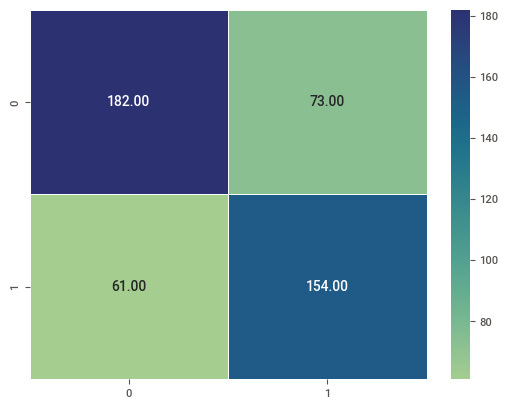

In [99]:
sns.heatmap(data=confusion_matrix(y1_test,y1_pred),annot=True,linewidth=0.5,fmt=".2f",cmap="crest")

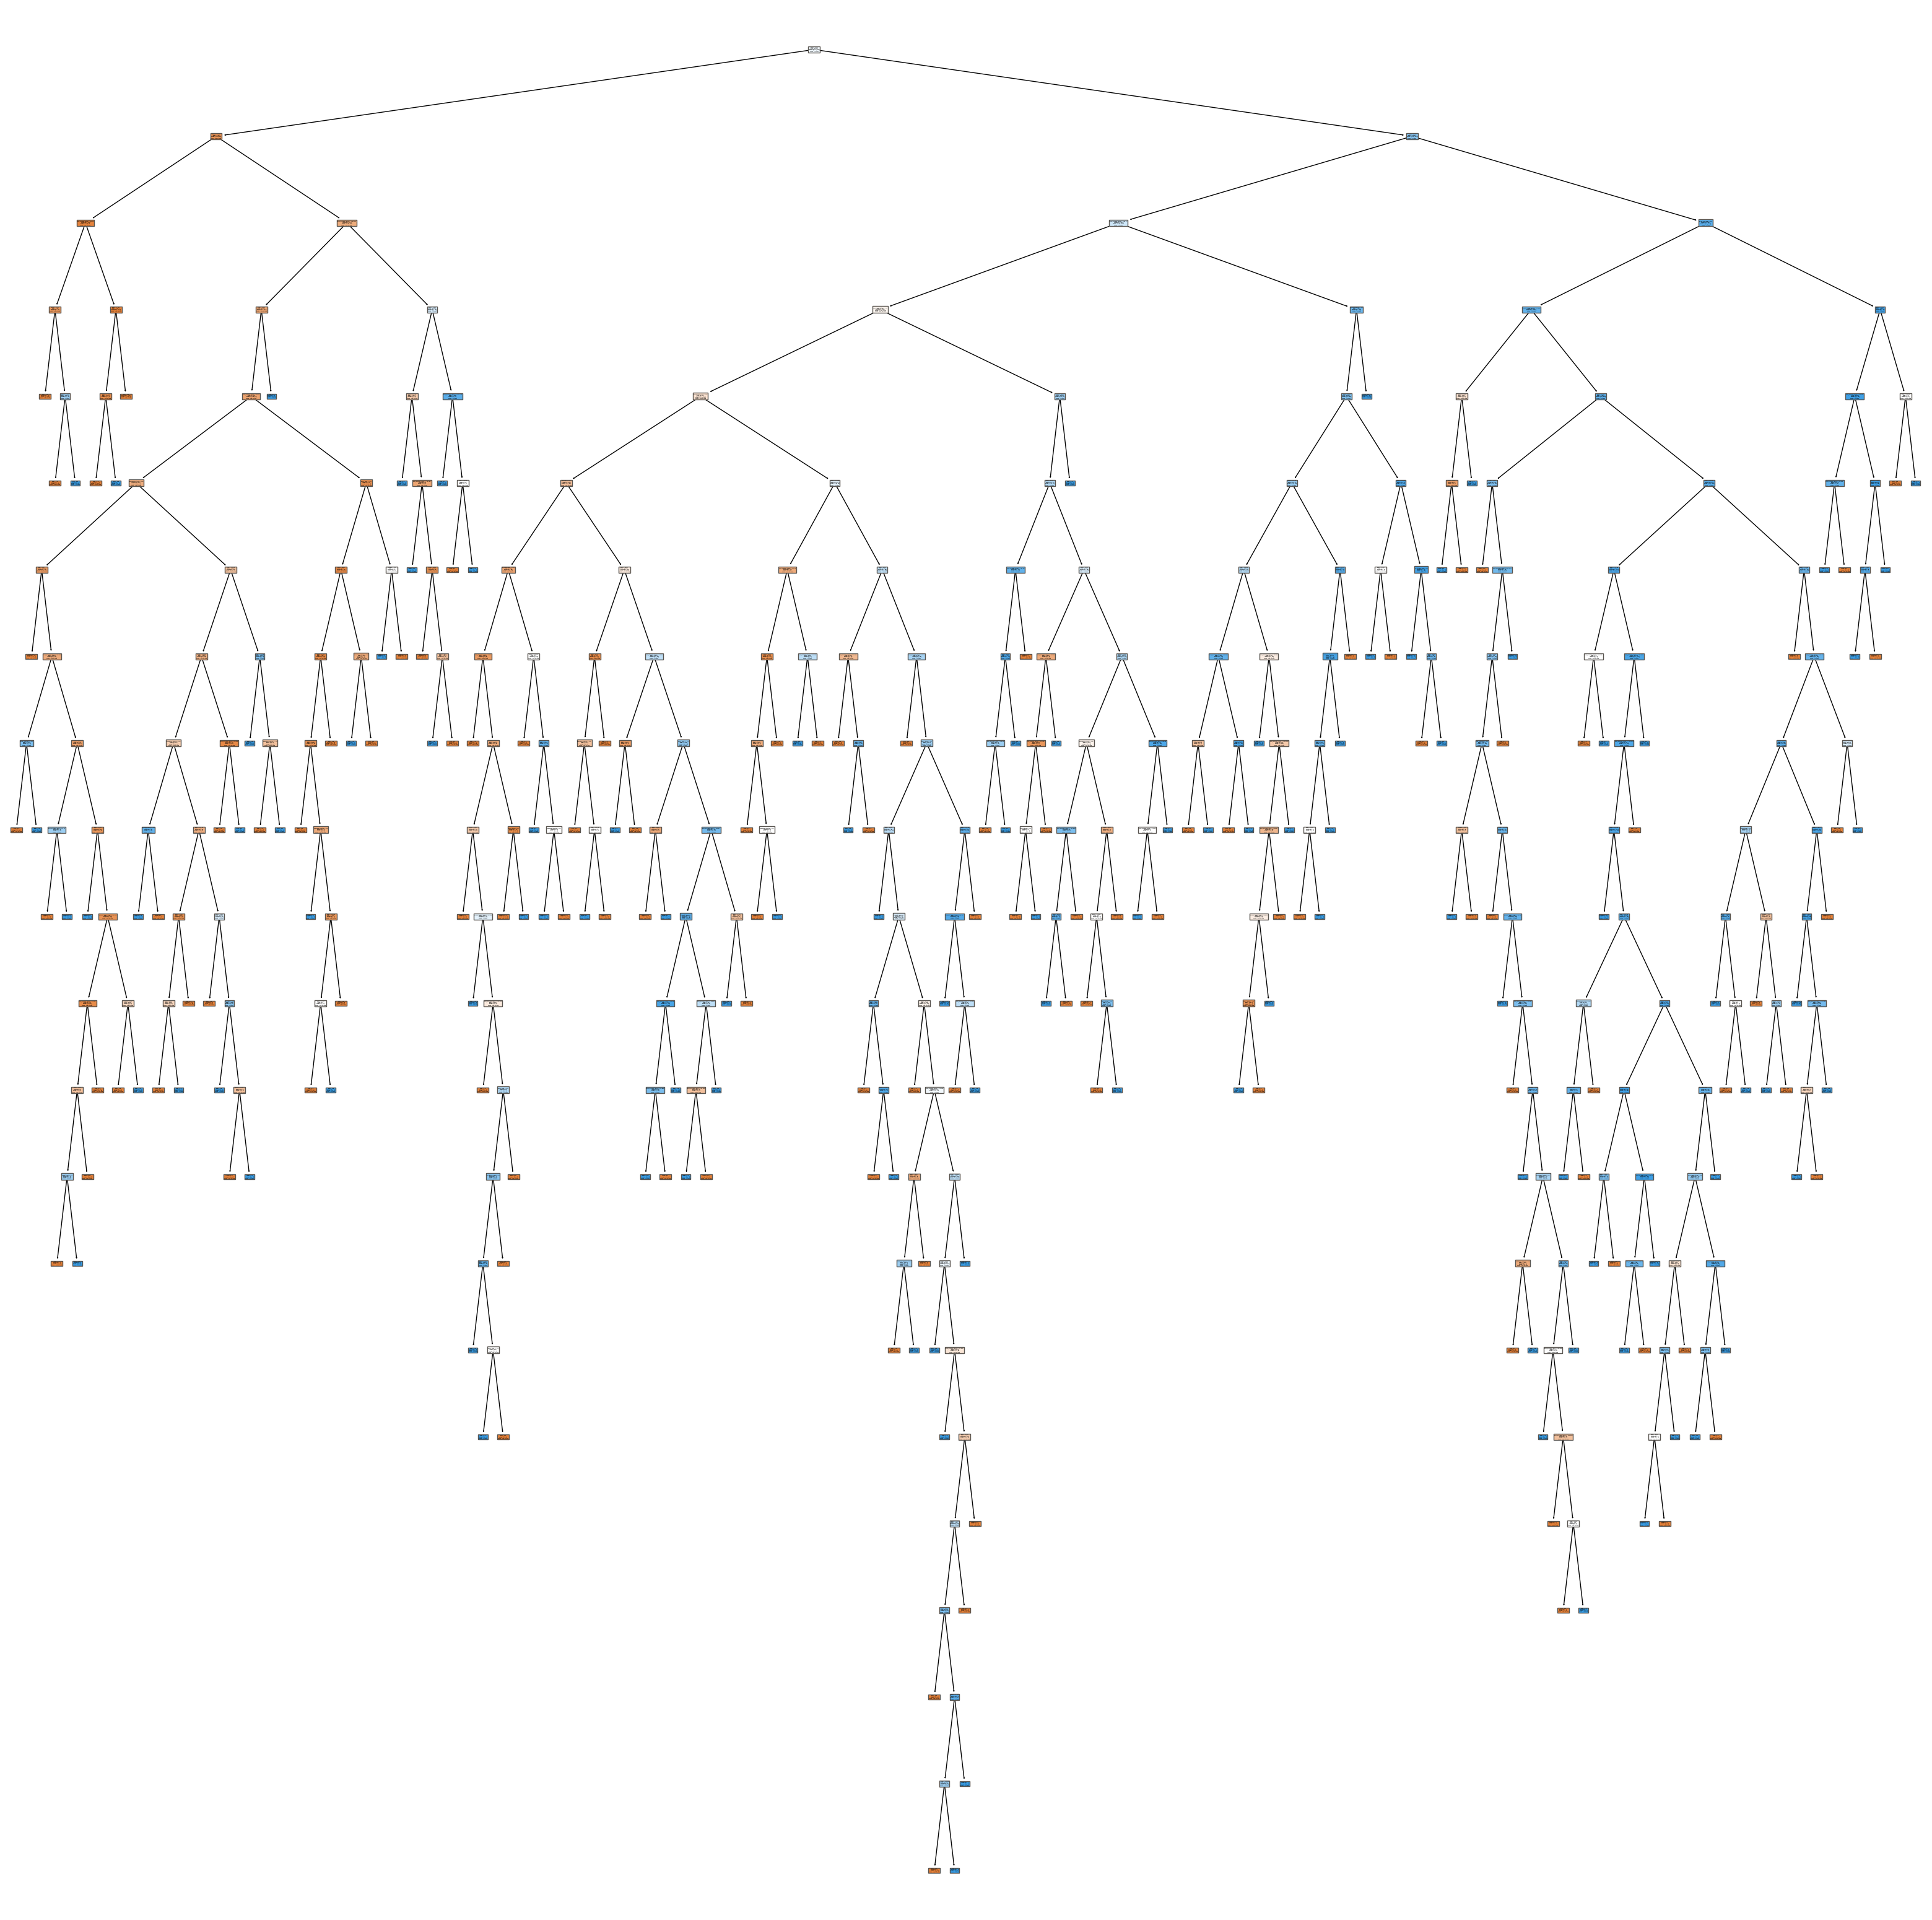

In [103]:
plt.figure(figsize=(40,40))
tree.plot_tree(model,feature_names=X1.columns,class_names=["No Stroke","Stroke"],filled=True);